<a href="https://colab.research.google.com/github/dougscohen/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [88]:
X = df.drop('diagnosis', axis=1)
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Perform K-Means Clustering on the Dataset

In [90]:
# Drop unnecesary columns

X = X.drop(['id', 'Unnamed: 32'], axis=1)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


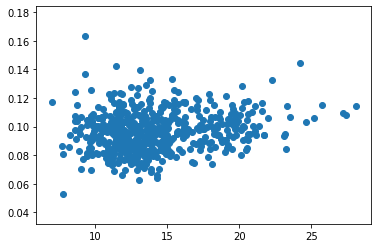

In [123]:
# Scatter Plot two features to find somewhat distinct clusters of cells and 
# also use eye-ball test to start thinking about number of clusters to use

plt.scatter(X['radius_mean'], X['smoothness_mean'])
plt.show()

In [0]:
# Use elbow method to decide on number of clusters to use

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

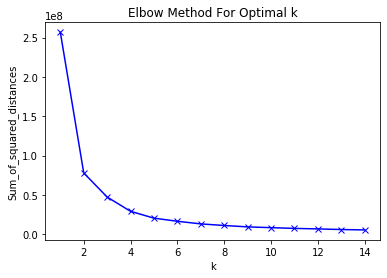

In [92]:
# Plot the elbow method

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [105]:
# Perform K-means

kmeans = KMeans(n_clusters=2)

# fit it to our cleaned data
kmeans.fit(X)

labels = kmeans.labels_

print(labels)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [106]:
# Add labels to the dataframe and name it 'Clusters'

X['clusters'] = pd.Series(labels)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [135]:
# Turn "diagnosis" column from original dataframe into numbers

df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M':1})

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [146]:
# Number of correct labels: (# of times our values in 'clusters' = the values in 'Diagnosis' in original dataframe )
# Number of correct labels / number of total observations

print(f"Accuracy Percentage:", ((df['diagnosis'] == X['clusters']).value_counts()[1] / df.shape[0])*100, f"%")

Accuracy Percentage: 85.41300527240774 %


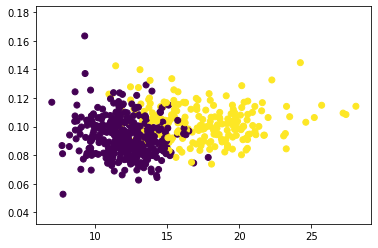

In [152]:
# Scatterplot of orgiginal dataframe

plt.scatter(df['radius_mean'], df['smoothness_mean'], c=df['diagnosis'])
plt.show()

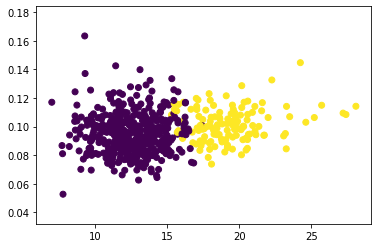

In [153]:
# Scatterplot after performing clustering

plt.scatter(X['radius_mean'], X['smoothness_mean'], c=X['clusters'])
plt.show()

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [154]:
# Standardize the data
scaler = StandardScaler()
Z = scaler.fit_transform(X)

# Principle Component Analysis - Fit and Transform
pca = PCA(2)
pca_features = pca.fit_transform(Z)
print("\n Projected Data: \n", pca_features)

# Eigenvalues and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n", pca.explained_variance_)


 Projected Data: 
 [[ 9.32458357  2.15004105]
 [ 2.80075393 -3.87551183]
 [ 6.00963721 -1.0251781 ]
 ...
 [ 1.16121013 -1.70080373]
 [10.48213445  1.96271873]
 [-5.45445088 -0.89170135]]

 Eigenvectors: 
 [[ 0.22015302  0.10259209  0.22810195  0.22225697  0.13510619  0.23023266
   0.25127503  0.25638174  0.13113065  0.05440461  0.20462603  0.01568475
   0.20917873  0.2021397   0.01060192  0.16093533  0.14527464  0.17627864
   0.03803918  0.09419536  0.2289514   0.10286574  0.23675945  0.22596384
   0.1214415   0.20134022  0.22089549  0.24547499  0.11696947  0.12210793
   0.20248774]
 [-0.21785004 -0.05184254 -0.19885168 -0.2152973   0.19144481  0.1643261
   0.07485011 -0.01933368  0.19444684  0.36418522 -0.09317234  0.08755953
  -0.07641224 -0.13818433  0.19894806  0.23953055  0.20373111  0.13907636
   0.18123165  0.28051358 -0.20395006 -0.03743703 -0.18342205 -0.20385693
   0.1766191   0.15578673  0.11156226  0.00744751  0.14697608  0.2796824
  -0.16517161]]

 Eigenvalues: 
 [13.8495

In [156]:
# Turn the projected data into a dataframe and rename columns

df_pca = pd.DataFrame(pca_features)

df_pca.columns = ['PC1', 'PC2']

df_pca

,PC1,PC2
0,9.324584,2.150041
1,2.800754,-3.875512
2,6.009637,-1.025178
3,6.614346,10.626254
4,4.274566,-2.001851
...,...,...
564,6.764202,-3.458015
565,4.172350,-3.614878
566,1.161210,-1.700804
567,10.482134,1.962719


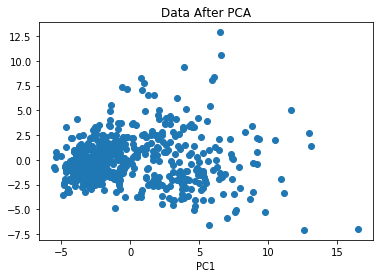

In [158]:
# Make a scatter plot of PC1 and PC2

plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title("Data After PCA before clustering")
plt.xlabel('PC1')
plt.show()

In [161]:
# Perform k-means with 2 clusters

kmeans = KMeans(n_clusters=2)

kmeans.fit(df_pca)

labels = kmeans.labels_

print(labels)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

In [162]:
# add 'clusters' column to the PCA dataframe

df_pca['clusters'] = pd.Series(labels)

df_pca.head()

,PC1,PC2,clusters
0,9.324584,2.150041,1
1,2.800754,-3.875512,1
2,6.009637,-1.025178,1
3,6.614346,10.626254,1
4,4.274566,-2.001851,1


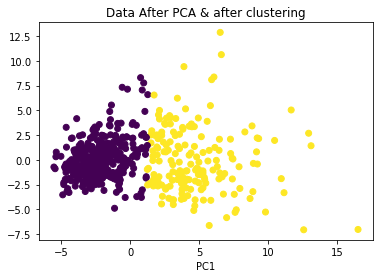

In [188]:
# Make a scatter plot of PC1 and PC2 after clustering

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['clusters'])
plt.title("Data After PCA & after clustering")
plt.xlabel('PC1')
plt.show()

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

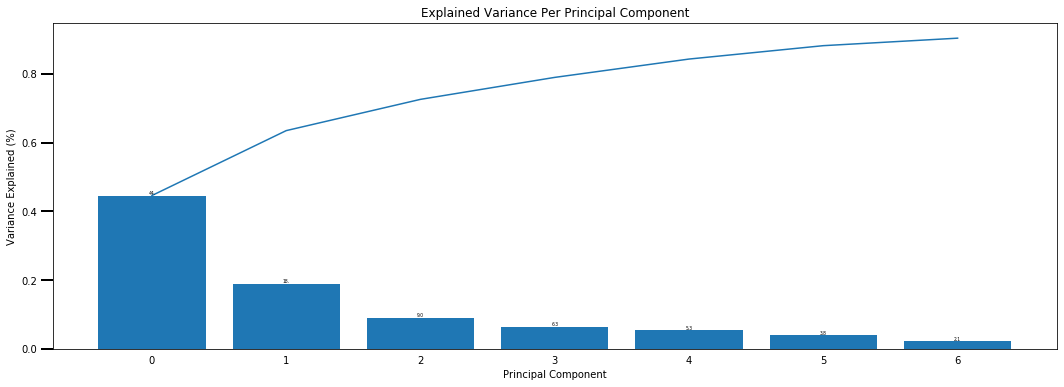

In [169]:
# retain only 90% of the explained variance
pca=PCA(.9)
pca_features_2 = pca.fit_transform(Z)

# make the scree plot 
scree_plot(pca)

In [170]:
# Turn the projected data into a dataframe and rename columns

df_pca_2 = pd.DataFrame(pca_features_2)

df_pca_2.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

df_pca_2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,9.324584,2.150041,-1.112108,-3.644284,-1.182367,1.412154,2.151872
1,2.800754,-3.875512,-0.528043,-1.124230,0.597697,0.025522,-0.047018
2,6.009637,-1.025178,-0.549446,-0.918287,-0.187701,0.540223,-0.686657
3,6.614346,10.626254,-3.195999,-0.183760,-2.982204,3.054413,1.422026
4,4.274566,-2.001851,1.397775,-2.944532,0.538734,-1.228769,-0.975990
...,...,...,...,...,...,...,...
564,6.764202,-3.458015,2.433378,-1.159673,-0.031590,-2.372841,-0.566001
565,4.172350,-3.614878,2.076739,2.506346,-0.525079,-0.247399,-0.726176
566,1.161210,-1.700804,0.516507,2.127755,1.867017,-0.530956,-0.135660
567,10.482134,1.962719,-1.885018,2.355260,-0.047585,0.567534,0.217900


In [183]:
# Perform k-means, but this time with 7 clusters as opposed to 2

kmeans = KMeans(n_clusters=7)

kmeans.fit(df_pca_2)

labels = kmeans.labels_

print(labels)

[6 4 4 5 4 1 4 1 1 5 0 1 6 0 1 1 0 1 4 3 3 2 1 4 4 6 1 4 1 4 4 1 4 4 1 1 1
 0 0 1 0 1 6 1 1 4 2 1 3 0 0 3 3 4 0 3 4 1 3 2 2 2 1 2 1 1 2 3 5 3 4 5 1 3
 3 4 2 6 6 3 2 1 6 4 3 4 0 4 0 1 0 0 3 3 1 4 2 2 3 1 0 2 0 2 2 1 2 3 6 2 2
 2 5 2 2 3 2 1 1 4 3 4 6 3 3 3 0 4 1 4 2 1 1 3 4 0 0 3 4 2 3 4 2 3 3 2 1 0
 3 3 2 5 5 3 2 3 4 0 3 3 2 4 4 2 4 3 3 4 4 3 3 0 1 2 3 3 5 1 0 3 6 6 4 3 3
 2 4 3 2 3 5 0 0 1 1 3 1 4 4 1 2 4 6 1 2 3 2 4 1 3 4 3 6 5 1 1 2 0 4 4 3 3
 2 1 3 3 3 3 0 1 1 0 0 4 2 0 6 4 0 4 3 3 5 0 4 2 0 1 0 3 6 3 6 4 4 1 6 1 6
 1 4 0 4 0 4 4 2 0 3 2 3 3 6 2 4 2 3 4 3 3 4 3 4 1 3 3 2 3 5 0 5 3 2 3 3 3
 3 0 3 2 6 0 6 2 3 0 3 3 3 3 3 3 3 3 2 3 3 4 5 0 2 4 3 6 3 3 3 3 1 1 1 3 2
 3 0 4 3 4 2 6 3 2 2 4 2 2 3 3 3 2 3 5 6 1 3 2 2 3 2 2 3 0 3 0 3 4 6 3 4 6
 1 3 4 4 3 3 5 0 3 1 2 3 0 2 3 0 3 3 5 4 3 2 1 6 2 0 3 3 3 3 1 3 0 3 3 2 3
 0 4 0 0 3 0 0 0 2 2 6 3 0 2 1 3 3 2 0 2 0 3 3 1 2 4 4 3 1 3 3 0 3 2 4 3 2
 4 2 4 3 0 4 0 4 0 3 3 0 0 0 0 0 4 6 0 3 3 1 3 2 6 2 2 0 3 0 3 3 0 3 2 1 3
 3 3 3 3 5 3 4 2 3 0 3 4 

In [184]:
# Add the numbers above as a new column in the dataset

df_pca_2['clusters'] = pd.Series(labels)

df_pca_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,clusters
0,9.324584,2.150041,-1.112108,-3.644284,-1.182367,1.412154,2.151872,6
1,2.800754,-3.875512,-0.528043,-1.124230,0.597697,0.025522,-0.047018,4
2,6.009637,-1.025178,-0.549446,-0.918287,-0.187701,0.540223,-0.686657,4
3,6.614346,10.626254,-3.195999,-0.183760,-2.982204,3.054413,1.422026,5
4,4.274566,-2.001851,1.397775,-2.944532,0.538734,-1.228769,-0.975990,4


## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

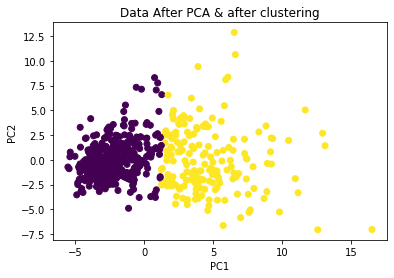

In [191]:
# Scatterplot of PC1 and PC2 after clustering with 2 clusters

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['clusters'])
plt.title("Data After PCA & after clustering")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

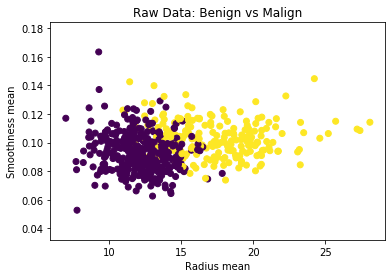

In [190]:
# Scatter plot on raw data

plt.scatter(df['radius_mean'], df['smoothness_mean'], c=df['diagnosis'])
plt.title("Raw Data: Benign vs Malign")
plt.xlabel('Radius mean')
plt.ylabel('Smoothness mean')
plt.show()

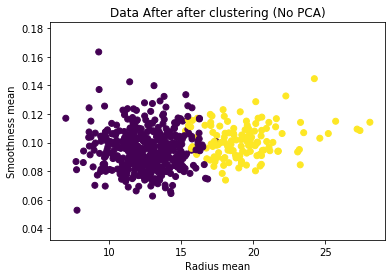

In [192]:
# Scatterplot of clustering before PCA

plt.scatter(X['radius_mean'], X['smoothness_mean'], c=X['clusters'])
plt.title("Data After after clustering (No PCA)")
plt.xlabel('Radius mean')
plt.ylabel('Smoothness mean')
plt.show()

In [163]:
# accuracy score for the PC1,PC2 Principal component clustering

print(f"Accuracy Percentage:", ((df['diagnosis'] == df_pca['clusters']).value_counts()[1] / df.shape[0])*100, f"%")

Accuracy Percentage: 91.91564147627417 %


In [185]:
# accuracy score for the 90% of explained variance clustering

print(f"Accuracy Percentage:", ((df['diagnosis'] == df_pca_2['clusters']).value_counts()[1] / df.shape[0])*100, f"%")

Accuracy Percentage: 24.077328646748683 %


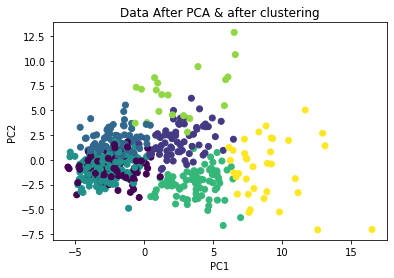

In [194]:
# Scatterplot of PC1 and PC2 after clustering with 7 clusters

plt.scatter(df_pca_2['PC1'], df_pca_2['PC2'], c=df_pca_2['clusters'])
plt.title("Data After PCA & after clustering")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [0]:
# Accuracy score when preprocessing with PCA is higher than it was when we simply used clustering on the raw data

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project